In [106]:
import pandas as pd
import numpy as np
import json
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import folium

In [39]:
archivo_json = '4.json'

# Se inicializa una lista para almacenar los objetos JSON
data = []

# Se lee el archivo JSON línea por línea y carga cada objeto JSON
with open(archivo_json, 'r') as archivo:
    for linea in archivo:
        objeto_json = json.loads(linea)
        data.append(objeto_json)

# Convierte la lista de objetos JSON en un DataFrame
df_goog_alaska01 = pd.DataFrame(data)

In [40]:
df_goog_alaska01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71515 entries, 0 to 71514
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  71515 non-null  object
 1   name     71515 non-null  object
 2   time     71515 non-null  int64 
 3   rating   71515 non-null  int64 
 4   text     39932 non-null  object
 5   pics     3735 non-null   object
 6   resp     3983 non-null   object
 7   gmap_id  71515 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.4+ MB


In [41]:
# filtra las filas donde la columna text no es nula y se crea goog_alaska01_df. 
goog_alaska01_df = df_goog_alaska01[df_goog_alaska01['text'].notnull()]

In [42]:
goog_alaska01_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39932 entries, 0 to 71409
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  39932 non-null  object
 1   name     39932 non-null  object
 2   time     39932 non-null  int64 
 3   rating   39932 non-null  int64 
 4   text     39932 non-null  object
 5   pics     3321 non-null   object
 6   resp     2404 non-null   object
 7   gmap_id  39932 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


In [43]:
goog_alaska01_df = goog_alaska01_df.copy()
goog_alaska01_df['text'] = goog_alaska01_df['text'].astype(str)

In [45]:
goog_alaska01_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39932 entries, 0 to 71409
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  39932 non-null  object
 1   name     39932 non-null  object
 2   time     39932 non-null  int64 
 3   rating   39932 non-null  int64 
 4   text     39932 non-null  object
 5   pics     3321 non-null   object
 6   resp     2404 non-null   object
 7   gmap_id  39932 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


In [44]:
# Concatenar todas las cadenas de 'attributes_cloud' en una sola
attributes_text = ' '.join(goog_alaska01_df['text'])

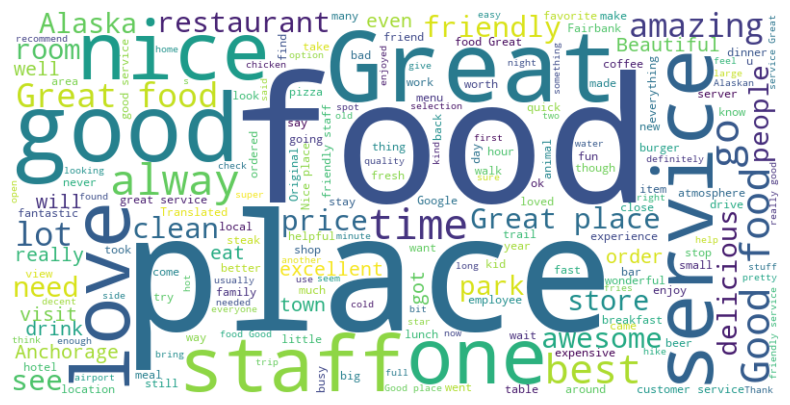

In [46]:
# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(attributes_text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
goog_alaska01_df['text'].head(10)

0                          So good,I enjoyed our lunch
1    Great breakfast, great service.  Never-ending ...
2                      The food and service was great.
3                                 Great bar for MNF!!!
4    Great service and attentive staff, I had a min...
5    I like the peanut farm, but they have THE WORS...
6                         Lots of TVs to watch sports.
7    Consistently great food with inconsistent serv...
8               Love the deck and draft beer selection
9                     The Fire frys and beer sooo good
Name: text, dtype: object

In [47]:

rating_counts = goog_alaska01_df['rating'].value_counts()
# Ordenar city_counts en orden descendente y mostrar los 10 primeros valores
#top_25_cities = city_counts.sort_values(ascending=False).head(25)

In [49]:
rating_counts

rating
5    23473
4     9457
3     4042
1     1598
2     1362
Name: count, dtype: int64

In [82]:
#df_train = goog_alaska01_df[['text']].copy()
# Crear df_train con las columnas 'text' y 'rating'
df_train = goog_alaska01_df[['text', 'rating']]

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39932 entries, 0 to 71409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39932 non-null  object
 1   rating  39932 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 935.9+ KB


In [84]:
# 5 registros donde df_train['rating'] = 3
ratings_3 = df_train[df_train['rating'] == 3].head(5)

# 5 registros donde df_train['rating'] = 2
ratings_2 = df_train[df_train['rating'] == 2].head(5)

# 5 registros donde df_train['rating'] = 1
ratings_1 = df_train[df_train['rating'] == 1].head(5)

In [85]:
# Mostrar los resultados
ratings_3

,text,rating
6,Lots of TVs to watch sports.,3
7,Consistently great food with inconsistent serv...,3
14,Acceptable American Food,3
17,Not a bad spot to catch a fight,3
19,Good beer. The food is ordinary.,3


In [80]:
# Mostrar los resultados
ratings_2

,text,rating
12,"Eh, some servers won't acknowledge you unless ...",2
13,Good beer prices that's about it.,2
15,Good beer prices that's about it.,2
72,Meh.,2
77,Food mediocre at best.,2


In [81]:
# Mostrar los resultados
ratings_1

,text,rating
25,"We sat down and received no service, we waite...",1
28,good service,1
43,It's been a on going problem every summer wher...,1
47,I was there today on my birthday and the barte...,1
54,Southwest egg roll to expensive to be so bland,1


In [87]:
# Definir condiciones y valores correspondientes
conditions = [
    (df_train['rating'] == 5) | (df_train['rating'] == 4),
    (df_train['rating'] == 3) | (df_train['rating'] == 2),
    (df_train['rating'] == 1)
]

values = ['Positivo', 'Neutro', 'Negativo']

# Aplicar las condiciones y valores a la nueva columna 'feeling'
df_train['feeling'] = np.select(conditions, values, default='Desconocido')

C:\Users\dlfja\AppData\Local\Temp\ipykernel_21028\1317917838.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['feeling'] = np.select(conditions, values, default='Desconocido')


In [89]:
# 5 registros donde df_train['rating'] = 3
ratings_3 = df_train[df_train['rating'] == 3].head(5)

# 5 registros donde df_train['rating'] = 2
ratings_2 = df_train[df_train['rating'] == 2].head(5)

# 5 registros donde df_train['rating'] = 1
ratings_1 = df_train[df_train['rating'] == 1].head(5)

In [92]:
ratings_1

,text,rating,feeling
25,"We sat down and received no service, we waite...",1,Negativo
28,good service,1,Negativo
43,It's been a on going problem every summer wher...,1,Negativo
47,I was there today on my birthday and the barte...,1,Negativo
54,Southwest egg roll to expensive to be so bland,1,Negativo


In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39932 entries, 0 to 71409
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     39932 non-null  object
 1   rating   39932 non-null  int64 
 2   feeling  39932 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [93]:
# Definir una función para limpiar el texto
def limpiar_texto(texto):
    # Eliminar caracteres especiales, signos de puntuación y números
    texto_limpio = re.sub(r'[^a-zA-Z\s]', '', texto)
    # Convertir el texto a minúsculas
    texto_limpio = texto_limpio.lower()
    return texto_limpio

# Aplicar la función de limpieza a la columna 'text' de df_train
df_train['text'] = df_train['text'].apply(limpiar_texto)

C:\Users\dlfja\AppData\Local\Temp\ipykernel_21028\129841706.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'] = df_train['text'].apply(limpiar_texto)


In [96]:
df_train.tail(20)

,text,rating,feeling
71390,its ketchikan,4,Positivo
71391,not much on the second floor,2,Neutro
71392,nice and spacious,3,Neutro
71393,safewaysailmcdonalds bernies and a whole lot more,4,Positivo
71394,its clean and limited stores wouldnt spend a d...,3,Neutro
71395,better than nothing,5,Positivo
71396,hardly anything there,2,Neutro
71397,not a regular mall not enough retail stores mo...,2,Neutro
71398,comfortably helpful staff,5,Positivo
71399,needs more stores like in the s,3,Neutro


In [97]:
# Descargar las palabras vacías en inglés
nltk.download('stopwords')
nltk.download('punkt')

# Lista de palabras vacías en inglés
stop_words = set(stopwords.words('english'))

# Definir una función para tokenizar, eliminar palabras vacías y espacios vacíos
def tokenizar_y_eliminar_stopwords(texto):
    # Tokenización
    tokens = word_tokenize(texto)
    
    # Eliminar palabras vacías y palabras en la lista de signos de puntuación
    tokens_filtrados = [token.lower() for token in tokens if token.lower() not in stop_words and token not in string.punctuation]
    
    # Unir los tokens filtrados en un solo string
    texto_filtrado = ' '.join(tokens_filtrados)
    
    return texto_filtrado

# Aplicar la función a la columna 'text' de df_train
df_train['text'] = df_train['text'].apply(tokenizar_y_eliminar_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dlfja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlfja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\dlfja\AppData\Local\Temp\ipykernel_21028\3386388396.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'] = df_train['text'].apply(tokenizar_y_eliminar_stopwords)


In [99]:
# Ver las primeras filas del DataFrame con el texto tokenizado y sin palabras vacías
print(df_train.head())

                                                text  rating   feeling
0                                goodi enjoyed lunch       5  Positivo
1  great breakfast great service neverending cup ...       5  Positivo
2                                 food service great       4  Positivo
3                                      great bar mnf       5  Positivo
4  great service attentive staff minor issue rest...       5  Positivo


In [100]:
# Inicializar el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Aplicar el vectorizador a la columna 'text' de df_train
tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['text'])

# El resultado es una matriz TF-IDF donde cada fila representa un documento y cada columna una palabra

Naive Bayes

In [104]:
# Separar las características (X) y las etiquetas (y)
X = df_train['text']
y = df_train['feeling']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el clasificador Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

# Mostrar el reporte de clasificación y la matriz de confusión
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Exactitud del modelo: 0.8247151621384751


c:\Users\dlfja\Desktop\pg\py_ch\venvYelp\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00       332
      Neutro       0.61      0.02      0.04      1086
    Positivo       0.83      1.00      0.90      6569

    accuracy                           0.82      7987
   macro avg       0.48      0.34      0.31      7987
weighted avg       0.76      0.82      0.75      7987

Matriz de confusión:
[[   0   11  321]
 [   0   20 1066]
 [   0    2 6567]]


c:\Users\dlfja\Desktop\pg\py_ch\venvYelp\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dlfja\Desktop\pg\py_ch\venvYelp\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine

In [107]:
# Separar las características (X) y las etiquetas (y)
X = df_train['text']
y = df_train['feeling']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizar el texto utilizando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicializar y entrenar el clasificador SVM
svm_classifier = SVC(kernel='linear')  # Puedes elegir diferentes tipos de kernel según tu preferencia
svm_classifier.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

# Mostrar el reporte de clasificación y la matriz de confusión
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Exactitud del modelo: 0.8616501815450106
              precision    recall  f1-score   support

    Negativo       0.63      0.30      0.41       332
      Neutro       0.58      0.34      0.43      1086
    Positivo       0.89      0.98      0.93      6569

    accuracy                           0.86      7987
   macro avg       0.70      0.54      0.59      7987
weighted avg       0.84      0.86      0.84      7987

Matriz de confusión:
[[ 100  120  112]
 [  47  371  668]
 [  12  146 6411]]
